# DS 453 / 653 Spring 2024: Project 1

---

_You must follow the Academic Code of Conduct and Collaboration Policy stated in the course syllabus at all times while working on this project._

This Jupyter notebook file explains the tasks that you must complete for Project 1. You must submit your final project on [Gradescope](https://www.gradescope.com/courses/497424). You have two opportunities to submit the project:

- The first submission date is Thursday, March 21 at 8pm. You __must__ complete Parts 1-3 by then to receive credit for the project! You can complete Parts 4-5 as well, or it's okay if those are still a work in progress. We will review your work and tell you whether you have passed, or otherwise what is needed to reach a passing grade.
- The second submission date is Thursday, March 28 at 8pm. You must complete the entire project by this time.

## Project Overview

In this project, you will explore how to use the Bitcoin blockchain. More precisely, you will use an alternative blockchain called "testnet." This blockchain acts like the real Bitcoin blockchain and uses nearly-identical code, except it is just for testing purposes and the coins don't "count" as real money.

There are five parts to this assignment:

1. Receive money on Bitcoin testnet.
2. Send money to yourself on testnet.
3. Send money to your classmates on testnet.
4. Trace the transactions between your classmates on testnet.
5. Return your coins.

I imagine that the bulk of the work will be in Parts 3 and 4. Because Part 4 relies on Part 3 being completed, the first three parts must be done by the first submission date of March 21.

An important warning before we continue:
> This assignment involves creating secret and public keys for Bitcoin testnet wallets. If you happen to own any cryptocurrency, do NOT use any of those keys in this project! (And also, don't reuse any keys generated here for any other purpose after the project is over.)

In [27]:
# Execute this code block only if you are using Google Colab.
# Otherwise, run the commands locally on your own computer.

# !pip install "cryptos @ git+https://github.com/nicolas3355/cryptos"
# !pip install pycryptodome

## Part 1: Receiving money on Bitcoin testnet

In this part of the project, you will create a cryptocurrency wallet and receive some coins.

Because real Bitcoins are expensive, in this task we will use the Bitcoin testnet instead. Testnet is a blockchain that uses all the real code of Bitcoin -- there are clients and nodes that have accounts and post transactions, and also miners who create blocks. There's just one big difference: the money doesn't count.


### Task 1.1: Create a Bitcoin testnet address

Execute the code below to generate a secret/public key pair for testnet.

> __Make sure that you only execute this block of code once!__ In fact, I recommend that you comment out this block after you have executed it, just to be sure that you do not execute it ever again. If you lose your secret key, _you won't be able to complete future steps and you will have to start over_.

In [28]:
# # Execute this cell block ONLY ONCE! (and do not modify it)

from cryptos.keys import gen_secret_key, PublicKey
from cryptos.bitcoin import BITCOIN

# # generate a random secret/public key pair
# secret_key = gen_secret_key(BITCOIN.gen.n)
# public_key = PublicKey.from_sk(secret_key)
# public_key_address = public_key.address('test', False)

# # print the secret key, as an integer
# print("Secret key:", secret_key)

# # print the address
# print("Address:", public_key_address)

Secret key: 82097242926903735500469043026487200140068518497837399783042116419213115354403

Address: n36wew3nrmFLTMQoyJxEuD79g7Ct9Jqep5

To be extra cautious that you don't forget your Bitcoin secret key, copy/paste it into the code block below. This way, if you accidentally re-run the previous code block or otherwise overwrite the `secret_key` variable, this code block will always allow you to get it back.

In [58]:
secret_key = 82097242926903735500469043026487200140068518497837399783042116419213115354403
public_key = PublicKey.from_sk(secret_key)
address = public_key.address('test', False)
pk_hashed = public_key.encode(False, hash160=True)

# print the address
print("Address:", address)
print("Public Key Hashed:", pk_hashed.hex())

Address: n36wew3nrmFLTMQoyJxEuD79g7Ct9Jqep5
Public Key Hashed: ecc83ff92b76cab438497b131d42a25426fa8827


Do not proceed further until you have stored your Bitcoin secret key!! You can even save a backup copy of it as a file on your computer somewhere else, if you want.

Whereas the secret key must be kept secret, the `address` is something you can share freely with anyone so that they can send you coins. Next, we'll see how that works.

### Task 1.2: Receive coins

On testnet, there are services called _faucets_ that will give you testnet-Bitcoins (written as tBTC) for free.

Here's how to receive tBTC:

1. Visit the website https://coinfaucet.eu/en/btc-testnet/.

2. Submit your testnet address to the website. The address is a hash of your public key. (Remember: _do not send your secret key_! Never send your secret key to anyone.)

3. Write down the following pieces of information from the confirmation page.

In [30]:
# Write down how many testnet-Bitcoins you received. It should be a fraction of a coin,
# data type: floating point number, written to 8 digits of precision

tBTC_received = 0.00049203

# Write down the address where you can send back the testnet coins once you are finished with them
# Most likely, you should only need to uncomment the address shown below
return_address =  "tb1qerzrlxcfu24davlur5sqmgzzgsal6wusda40er"

# converting from tBTC to Satoshis, which are the smallest unit of money within Bitcoin
# in other words, multiply by 10^8
# data type: integer
sat_received = int(tBTC_received * 100000000)

### Task 1.3: Find your coins

On testnet, a block gets mined every 10 minutes on average.  Check that a transaction has been mined (or is still in mempool waiting to be picked up by a miner) by visiting https://mempool.space/testnet/mempool-block/0 and searching for your address. Remember: only copy/paste your public address into mempool; never share your secret key with anyone!

At first you will see that the confirmation is unconfirmed but soon it will get picked up by a miner. Your address should be recorded in 1 transaction, where you received some coins from the faucet. Click on the link to explore that transaction in more detail.

Copy the transaction hash (as a hex string) below. For example if your transaction was https://mempool.space/testnet/tx/5c8288498b29d8b6208f924bafddaa5794549cb2d33e084994708c58e52d62e0 then your transaction hash would be 5c8288498b29d8b6208f924bafddaa5794549cb2d33e084994708c58e52d62e0.

In [31]:
# transaction hash, corresponding to the transaction that sent money into your address
# data type: hex string
transaction_hash = "7ef186c11c71b33a45bfe1f13b6b5a469b9295898783a867dd341d7faf3d43a7"

Next, click on the "details" button next to "Inputs & Outputs." Your transaction is likely to have one input account and two outputs.

- The input account is owned by the faucet.
- One of the two outputs belongs to the faucet. The other one, if you've done the above steps correctly, should belong to you!

The two output scripts both have the following format.

    OP_DUP
    OP_HASH160
    OP_PUSHBYTES_20 [hashed-public-key]
    OP_EQUALVERIFY
    OP_CHECKSIG

Run the code below to check that your public key is included in one of the locked output scripts. Your bitcoin address is just the hash of your public key, but using a hash function called `Hash160` rather than the `SHA-256` function we have discussed so far in class.

In [32]:
# Do NOT modify this code block!

from cryptos.keys import b58decode, b58encode
from cryptos.sha256 import sha256
from binascii import hexlify

print("OP_DUP")
print("OP_HASH160")
print("OP_PUSHBYTES_20 " + hexlify(pk_hashed).decode("ascii"))
print("OP_EQUALVERIFY")
print("OP_CHECKSIG")

OP_DUP
OP_HASH160
OP_PUSHBYTES_20 ecc83ff92b76cab438497b131d42a25426fa8827
OP_EQUALVERIFY
OP_CHECKSIG


Which output is the one corresponding to your address? Write down the index, starting at 0. That is, consider the top output to be index 0, the one after that to be index 1, and so forth.

In [33]:
# write down the index corresponding to the script that you own
# data type: integer
script_index = 1 # todo: write here!

The script above says that:

> Whoever can provide (1) a public key that hashes to the specified hash digest and (2) a valid digital signature corresponding to this public key has the right to transfer these coins somewhere else.

Because you know the secret key, you can unlock this script and spend its coins!

_Just to confirm: you did keep your secret key safe, right? Remember that you will need it for the rest of this project, because only that gives you the power to send coins. If you lose your secret key, you will have to start the project over again. You don't want that._

## Part 2: Send money to yourself

In this part of the project, you will post a transaction to the testnet blockchain to send some of your coins to the instructor, and keep the rest of the coins for yourself.

### Task 2.1: Create a transaction

In this step, you are going to send some of your tBTC coins to the instructors. Our address is "mvvssVimoMGdJ2fExKvH1ydjqRQLdbswQe"

Please read and understand the code block below, and then execute it. It will produce a script to send 100 Satoshi to the instructors (you can change this amount if you wish), 300 Satoshi as a fee to the miner who puts this transaction into the block, and the remaining money back to yourself.

In [34]:
# Execute, but do NOT modify this code block!

from cryptos.transaction import Tx, TxIn, TxOut, Script, OP_CODE_NAMES
from cryptos.ecdsa import sign, verify, Signature
from binascii import hexlify

# first, let's specify the input to the transaction
# this will tell the Bitcoin network where you received the money that you are now spending
in_pkb_hash = hexlify(pk_hashed).decode("ascii")

tx_in = TxIn(
    net = "test",                              # specifying that the network is ran on testnet
    prev_tx = bytes.fromhex(transaction_hash), # transaction in which you received the coins
    prev_index = script_index,                 # index within the transaction where you received coins
    script_sig = None,                         # this field will have the digital signature, to be inserted later
)
tx_in.rev_tx_script_pubkey = Script([118, 169, in_pkb_hash, 136, 172]) # writing the script that you are going to unlock


# transaction output 1: send money to the instructors
# this is the pk_hashed for the instructors' Bitcoin testnet wallet, corresponding to our address mvvssVimoMGdJ2fExKvH1ydjqRQLdbswQe
out1_pkb_hash = bytes.fromhex("a9102d676b93d159fff7041d4f36f78b585c54df")
out1_script = Script([118, 169, out1_pkb_hash, 136, 172]) # OP_DUP, OP_HASH160, <hash>, OP_EQUALVERIFY, OP_CHECKSIG
tx_out1 = TxOut(
    amount = 100, # sending 100 Satoshis to the instructors
    script_pubkey=out1_script
)

# transaction output 2: sending the remaining money back to you
out2_pkb_hash = pk_hashed
out2_script = Script([118, 169, out2_pkb_hash, 136, 172])
tx_out2 = TxOut(
    amount = sat_received - 100 - 300, # leaving 300 Sat unclaimed, so the miner can take it as a fee
    script_pubkey=out2_script
)

tx = Tx(
    version = 1,
    tx_ins = [tx_in],
    tx_outs = [tx_out1, tx_out2],
)

# sign the input transaction and unlock the script
message = tx.encode(sig_index = 0)
sig = sign(secret_key, message)
sig_bytes_and_type = sig.encode() + b'\x01' # DER signature + SIGHASH_ALL
pubkey_bytes = public_key.encode(compressed=False, hash160=False)
script_sig = Script([sig_bytes_and_type, pubkey_bytes])
tx_in.script_sig = script_sig

# print the transaction, in hex
print(tx.encode().hex())

0100000001a7433daf7f1d34dd67a883878995929b465a6b3bf1e1bf453ab3711cc186f17e010000008b483045022100ad029e534319fa8dae9e14c302769dcbd7268de222a4919706de2bedbf656e250220639fd555e112999204ccc9617a71e39259f51bdba5319703514e7b120ce51b40014104937b3099fb1ef672b86a6e755417cc0b06d5e8068d0f38ceac8e458603ab897d00d64d8906ebfc0e8ef9d4259581c6d15f5af43935a59e3b22bfbfcb29461562ffffffff0264000000000000001976a914a9102d676b93d159fff7041d4f36f78b585c54df88aca2be0000000000001976a914ecc83ff92b76cab438497b131d42a25426fa882788ac00000000



Now do the following steps:

1. Copy the transaction in hex and paste it here: https://blockstream.info/testnet/tx/push. They will broadcast your transaction to the testnet nodes, and within a few minutes one of the miners will include it in a block.

2. Write down your transaction id below, so we can find it and check that you have completed this step successfully.

__Task 2.1 response:__

[Todo: write the transaction ID here! If you can do so, please also attach a screenshot of the mempool.space page for this transaction.]

ID: f1af1129796baa1e57c0e2c12e1034520041a16b686c0c7c1332d9cb4d2f049d

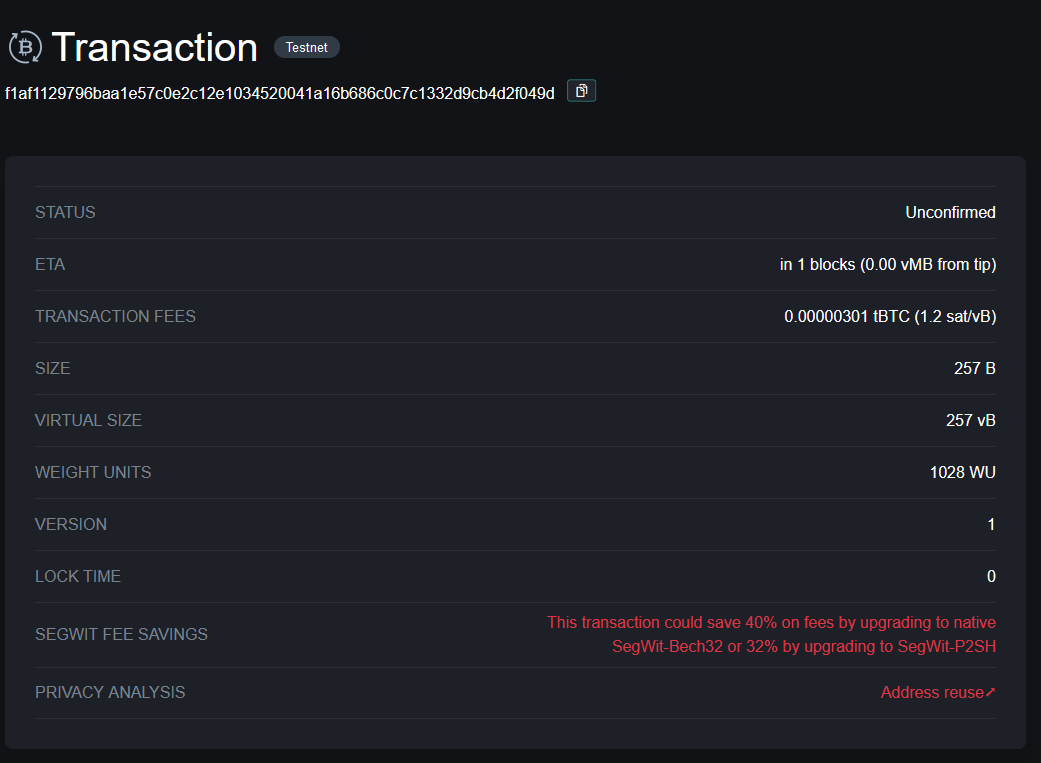

In [52]:
transaction_hash = "f1af1129796baa1e57c0e2c12e1034520041a16b686c0c7c1332d9cb4d2f049d"

### Task 2.2: Improve pseudonymity

The code block in Task 2.1 above suffers from one defect: it creates a transaction that shows money being spent out of an account, and most of the coins are transferred back into the _same_ account. This is not ideal from the perspective of privacy; it could allow an attacker to link transactions over time.

A better strategy is to create a new account to receive the funds. Modify the code from Task 2.1 to do this. In fact: create a function that allows you to spend some of your own money, and also keep the change in a different wallet. As before, we're going to consider a transaction with one input address and two output addresses.

_Reminder: whenever you create a new secret key, you must make sure to remember it somewhere! If you lose any secret key that you generate in this project, you will be in trouble. Make sure to store all keys safely._

__Task 2.2 response:__

In [35]:
def create_transaction(secret_key, in_pkb_hash, transaction_hash, script_index, out1_pkb_hash, out1_amount, out2_pkb_hash, out2_amount):
    
    # first, let's specify the input to the transaction
    in_pkb_hash = hexlify(in_pkb_hash).decode("ascii")
    tx_in = TxIn(
        net = "test",                              # specifying that the network is ran on testnet
        prev_tx = bytes.fromhex(transaction_hash), # transaction in which you received the coins
        prev_index = script_index,                 # index within the transaction where you received coins
        script_sig = None,                         # this field will have the digital signature, to be inserted later
    )
    tx_in.rev_tx_script_pubkey = Script([118, 169, in_pkb_hash, 136, 172]) # writing the script that you are going to unlock


    # transaction output 1: send money to the instructors
    out1_pkb_hash = bytes.fromhex(out1_pkb_hash)
    out1_script = Script([118, 169, out1_pkb_hash, 136, 172]) # OP_DUP, OP_HASH160, <hash>, OP_EQUALVERIFY, OP_CHECKSIG
    tx_out1 = TxOut(
        amount = out1_amount,
        script_pubkey=out1_script
    )

    # transaction output 2: sending the remaining money back to you
    out2_pkb_hash = bytes.fromhex(out2_pkb_hash)
    out2_script = Script([118, 169, out2_pkb_hash, 136, 172])
    tx_out2 = TxOut(
        amount = out2_amount,
        script_pubkey=out2_script
    )

    tx = Tx(
        version = 1,
        tx_ins = [tx_in],
        tx_outs = [tx_out1, tx_out2],
    )

    # sign the input transaction and unlock the script
    message = tx.encode(sig_index = 0)
    sig = sign(secret_key, message)
    sig_bytes_and_type = sig.encode() + b'\x01' # DER signature + SIGHASH_ALL
    pubkey_bytes = public_key.encode(compressed=False, hash160=False)
    script_sig = Script([sig_bytes_and_type, pubkey_bytes])
    tx_in.script_sig = script_sig

    # print the transaction, in hex
    print(tx.encode().hex())

## Part 3: Send money to your classmates

Now that you know how to send money to yourself, send some money to your classmates.

In order to complete this part of the project: find at least 3 classmates in the Crypto for Data Science class, and send some testnet coins to them.

Remember that other students will be asking you for an address so that they can send money to you, in order to complete this part of their project. Use the technique you learned in Task 2.2 to improve pseudonymity: your goal should be to give each classmate a fresh new address that cannot be linked back to the rest of your money.

Show all relevant code below.

### Task 3.1: Create many Bitcoin testnet addresses pseudorandomly

In order to try to preserve your pseudonymity, you should hand a different Bitcoin address to each of your classmates. One way that you could do this is to run the code block from Task 1.1 over and over again to generate many secret/public key pairs, and then carefully keep track of all of your secret keys. That will work, but it's tedious.

Instead, let's use the idea of _hierarchical deterministic wallets_ that we learned in Lecture 8 (...but without the hierarchy). Specifically, your goal here is to generate a method that would allow you to protect a single __secret seed__, and use that to generate many secret/public key pairs.

In the `cryptos` library, we have created a new method called `gen_secret_key_from_bytes` that will deterministically (but pseudorandomly) generate a secret key given a seed. Here is an example to show how it works.

In [36]:
# Execute this code block multiple times.
# Observe that the output is the same each time, unlike in Part 1.
# That's because the new method gen_secret_key_from_bytes is repeatable if you use the same seed.

from cryptos.keys import gen_secret_key_from_bytes, PublicKey
from cryptos.bitcoin import BITCOIN

super_secret_seed = b"1234567890123456789012345678901234567890123456789012345678901234567890"
secret_key = gen_secret_key_from_bytes(BITCOIN.gen.n, super_secret_seed)
public_key = PublicKey.from_sk(secret_key)
public_key_address = public_key.address('test', False)

# print the secret key, as an integer
print("Secret key:", secret_key)

# print the address
print("Address:", public_key_address)

Secret key: 34898150363254957465749142463706752256725619842651514335399468822696204774367
Address: myb5SsjenAiczwoi8HtRkC3UwDrGAZMTza


### Super secret seed (secure)

In [37]:
from mnemonic import Mnemonic
from base64 import b64encode

mnemo = Mnemonic("english")
words = mnemo.generate(strength=256)
seed = mnemo.to_seed(words, passphrase="")
super_secret_seed_encode = b64encode(seed)

secret_key = gen_secret_key_from_bytes(BITCOIN.gen.n, super_secret_seed_encode)
public_key = PublicKey.from_sk(secret_key)
public_key_address = public_key.address('test', False)

# print the secret key, as an integer
print("Secret key:", secret_key)

# print the address
print("Address:", public_key_address)

Secret key: 14080431894589117869781483827721744296204525351216134045268615768818933539138
Address: mmhFheXSSBwWXXt9CMRLsrPVWqSyoSXgLt


This method will get you part of the way toward the goal. But remember that we want to store only one secret_seed and generate __many__ secret/public key pairs from it.

Your task is to use the ideas from Lecture 8 in order to design a method that will generate at least 10 secret/public keys from a single seed.

__Your response:__

In [53]:
def keygen10(seed):
    keys = []
    for i in range(10):
        secret_key = gen_secret_key_from_bytes(BITCOIN.gen.n, seed + bytes([i]))
        public_key = PublicKey.from_sk(secret_key)
        hashed_public_key = public_key.encode(False, hash160=True)
        public_key_address = public_key.address('test', False)
        keys.append((secret_key, hashed_public_key, public_key_address))
    return keys       

In [55]:
keys = keygen10(super_secret_seed_encode)
for i in keys:
    print(i)

(38687240453306722794891955927892182412240977689603851502577585353589667330821, b'3\xa0\xe6\xdfbq\xdc\x16\x93AF\\\xc5}bi\x18\x028\x91', 'mkDwWVaptHb1CvEgcFzNXMUUz6YNTSaCc1')
(7184065208375075148412162836090070222269218180561923682759577568665653723528, b'3\xd4\xeb\xbf\xa5\x00\x87\xc0\x16w?\x93g+\xe3\x1cH2\xeb>', 'mkF1pqhGy6pV3U1XnLmAGyXVpJ3ACRyNeD')
(97459329019496063214870007241795283653246053198026935611832655235550277071786, b'\x9br\xcf\xf1\xbbi%\xd8\xc1\x81\x9d\xd05RbVM\xee\x0f\xb4', 'mugta5t4Z2qVXwcmV4skoWPz9rSTH35EDe')
(74433954542163204506109481158639808706792269155447466602207450420780087130853, b'u\x9a\x02\x0e\xcbOB\xeaIz,\xf5t 9D\xcb\xd6\xfe\x19', 'mrEmrAUsBHzWmZSdvqdoJznirVWLJEp4fL')
(65546618121482142257366454372613187936846715539288607746159585310969277571626, b'\x0b\x86\xa1\x1f[\xf6\xbbhi\xb3\xc6\xffU\xe4\x17)\xb5\x86\x89/', 'mgZu1NsAj5E9MDganiRKLyfMJa2e8UxwMc')
(77603483788208501454758163525793647801161169622370832350368952690957213213862, b'\xe3\x8d\x95\xee3F\xee\xc41\x

### Task 3.2: Send and receive testnet Bitcoins

You have the two crucial ingredients that you need to send and receive tBTC.

1. You have some coins.
2. You have the ability to generate new keys/addresses on demand.

In this task, you must talk with your classmates, exchange public keys (not secret keys!), and use it to transfer tBTC through the testnet blockchain.

In the space below, provide the mempool.space links to all transactions in which you were the _sender_. There must be at least 3 such transactions. Make sure your response clearly shows the (1) Bitcoin address and (2) transaction IDs of these transactions.

__Task 3.2: transactions in which you were the sender__

Transcaction 1

In [56]:
sat_received = int(tBTC_received * 100000000)
in_pkb_hash = "ecc83ff92b76cab438497b131d42a25426fa8827"
transaction_hash = "f1af1129796baa1e57c0e2c12e1034520041a16b686c0c7c1332d9cb4d2f049d"
script_index = 1
out1_pkb_hash = "3eb5f6f63dee4b56715c7cb2731cfe68c9932dac"
out2_pkb_hash = "new address"
secret_key = 82097242926903735500469043026487200140068518497837399783042116419213115354403

create_transaction(secret_key, in_pkb_hash, transaction_hash, script_index, out1_pkb_hash, 100, out2_pkb_hash, sat_received - 100 - 300)

TypeError: a bytes-like object is required, not 'str'

Transcaction 2

In [ ]:
create_transaction(in_pkb_hash, transaction_hash, script_index, "FRIEND PUBLIC KEY", 100, keys[1][1], 10)

Transcaction 3

In [ ]:
create_transaction(in_pkb_hash, transaction_hash, script_index, "FRIEND PUBLIC KEY", 100, keys[1][1], 10)

Next, provide the mempool.space links for all transactions in which you were the _receiver_. Once again, make sure your response clearly shows the (1) Bitcoin address and (2) transaction IDs of these transactions.

__Task 3.2: transactions in which you were the receiver__

[Todo: write here!]

## Part 4: Track your classmates' spending

Remember how Bitcoin works:
- you know the addresses of anyone you've ever sent money to or received money from, and
- every transaction is posted publicly for the world to see.

You can use these facts to track other people's spending! Let's see how.

### Task 4.1: Learn how to link transactions

Even though we tried in Task 2.2 to provide pseudonymity, one can make an educated guess as to which addresses belong to the same people. For example, take a look at this transaction: https://mempool.space/testnet/tx/ac44742345a22d88580f34f3a20683da955c8a1206e5b69330c61e7f8520ecf4. It was created by one of the students who performed Task 2.2 in last year's class. They sent 100 satoshis to the instructors, and from the workflow you can probably guess that the change address `mqfwaJbkuJSmrPb3oqjx2ZsQDFk1Fz1t8e` and the sender address `mm5mG34BBkLvKUfWzdQUQTpGfs5nrz2vJT` belong to the same person!

Let's read about how that can be done at scale across the Blockchain. Read [this Wired article](https://www.wired.com/story/27-year-old-codebreaker-busted-myth-bitcoins-anonymity/) about Sarah Meiklejohn's work to trace transactions across Bitcoin, such as coins sent to currency exchanges or websites that sold (sometimes illegal) goods via Bitcoin. Alternatively, you can read the [original paper](https://cseweb.ucsd.edu/~smeiklejohn/files/imc13.pdf) or [Sarah's PhD thesis](https://smeiklej.com/files/dissertation.pdf) if you prefer.

Write a summary of the reading below. We are looking for 1-2 paragraphs that show that you understood the material.

__Task 4.1 response:__

[Todo: write here!]

### Task 4.2: Track your classmates

Using your newfound knowledge, try to find as many Bitcoin addresses and transaction ids produced by your classmates! Remember that they all performed Parts 1-3 of the project as well.

Include below any code, links, screenshots, or any other information needed for us to understand (a) how you performed your linking attack and (b) what you have discovered.

To pass this part of the project, you must be able to uncover at least one classmate's address and one transction between a pair of classmates that does not involve you, and you must be able to explain how you deduced that this was a transaction involving your classmates.

__Task 4.2 response:__

[Todo: write here!]

## Part 5: Return the remaining coins

Once you are done with the project, send any remaining tBTC coins back to the original faucet so that they can be used by someone else later. Use the `return_address` that you saved in Task 1.2 to remember where the coins need to go.

In [ ]:
# TODO: write here!

## Documenting collaborators, sources, and AI tools

In accordance with the collaboration policy, use the space below to report if you used any resources to complete this homework assignment, aside from the lecture notes and the course textbooks/videos. Specifically, please report:

1. Names of all classmates you worked with, and a short description of the work that you performed together.
2. All written materials that you used, such as books or websites (besides the lecture notes or textbooks). Please include links to any web-based resources, or citations to any physical works.
3. All code that you used from other sources. In particular, if you used an AI tool, then you must include the entire exchange with the AI tool, as per the [CDS Generative AI Assistance Policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).

Remember that if we discover any undocumented collaborators, sources, or AI tools then this is grounds for a Not Passed grade on the project without the ability to resubmit, and possible referral to BU's Academic Conduct Committee (as described in the syllabus). It is in your own interest to document all collaborators, sources, and tools used!

__Your response:__

1.

2.

3.

When you have completed the project, please submit this .ipynb file to Gradescope.